### Task
The project is about building a classification model for the 'heart disease data' to predict if the patience has the heart disease or not according to the several features of the patience. 

---------
### The feature of the patience is showed belowing:

age - age in years
sex - (1 = male; 0 = female)
cp - chest pain type
trestbps - resting blood pressure (in mm Hg on admission to the hospital)
chol - serum cholestoral in mg/dl
fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
restecg - resting electrocardiographic results
thalach - maximum heart rate achieved
exang - exercise induced angina (1 = yes; 0 = no)
oldpeak - ST depression induced by exercise relative to rest
slope - the slope of the peak exercise ST segment
ca - number of major vessels (0-3) colored by flourosopy
thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
target - have disease or not (1=yes, 0=no)

---------

### The procedure of the project has 4 steps:

1. data preparation 
import the data and do some data cleaning and descriptive analysis to better understand the data
1. data exploration 
identify the basic feature of the data and find out the useful variable which can have the effect on the target according to the correlation with the target.
2. data engineering 
normalize and re-arrange the data in order to make the analysis more meaningful.
3. fit the classification model
use logistic, svm, knn, random forest, naive bayes model to do the classification prediction. Compare their test errors to select the best model can be used for the project.

In [88]:
# import the necessary package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Data importing

In [120]:
df = pd.read_csv("/Users/jepsondu/OneDrive/ML/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Data exploration & Descriptive analysis

In [92]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [94]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


From the result we can see the data is clean, so we do not need to do more extra data cleaning job

In [97]:
df.target.value_counts()


1    165
0    138
Name: target, dtype: int64

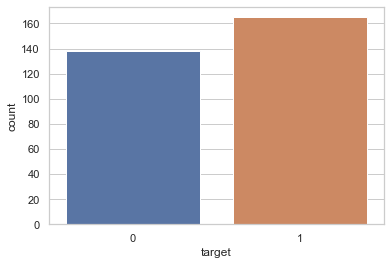

In [98]:
sns.countplot(x="target", data=df)
plt.show()

### Pre-select the variables by checking the difference and the correlation

In [99]:
#look at the difference of all the variable and the target to has a basic view about which vairable can effect the target.
df.groupby('target').mean()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


In [100]:
#Get the correlation between the variables and the target to get a more in-depth insight about which varible we should include in the model.
corr_matrix = df.corr()
corr_matrix
#From the matrix we can see that the chol and fbs has a very low correlationship with tarhet

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


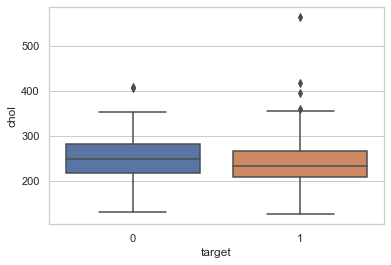

In [101]:
#use boxpot to check the difference between the chol, fbs and target.
sns.set(style="whitegrid")
ax = sns.boxplot(x=df["target"], y=df["chol"])


In [121]:
# I decide to delte the chol and fbs in the dataframe because it woul not has a great effect on the target
df = df.drop(columns=['chol','fbs'])
df.head()
df.shape

(303, 12)

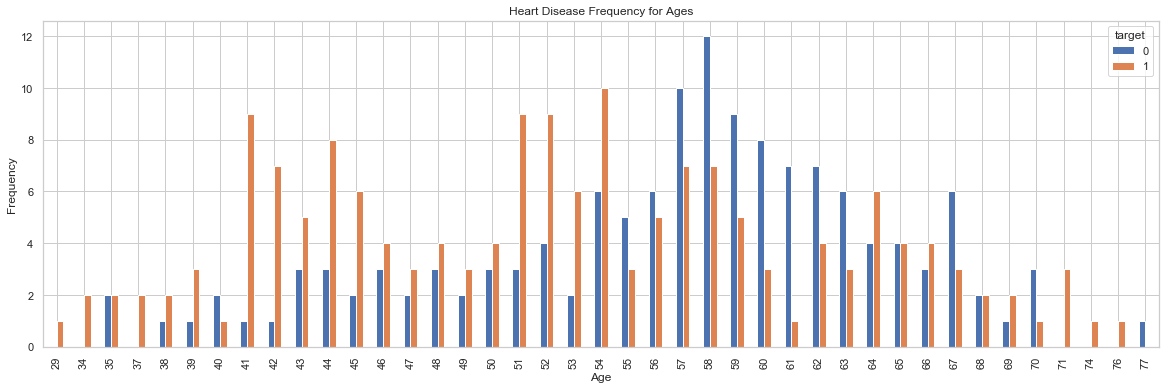

In [122]:
#use crosstab to calculate the 
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

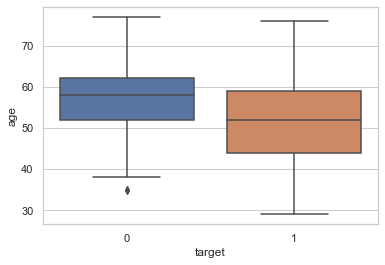

In [123]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df["target"], y=df["age"])


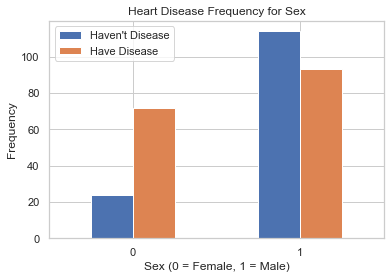

In [124]:
pd.crosstab(df.sex,df.target).plot(kind="bar")
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

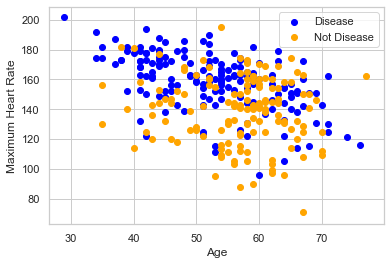

In [125]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="blue")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)], c="orange")
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

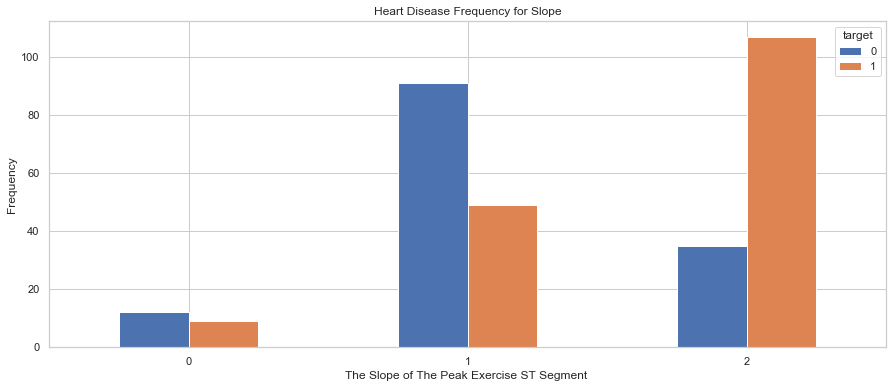

In [126]:
pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

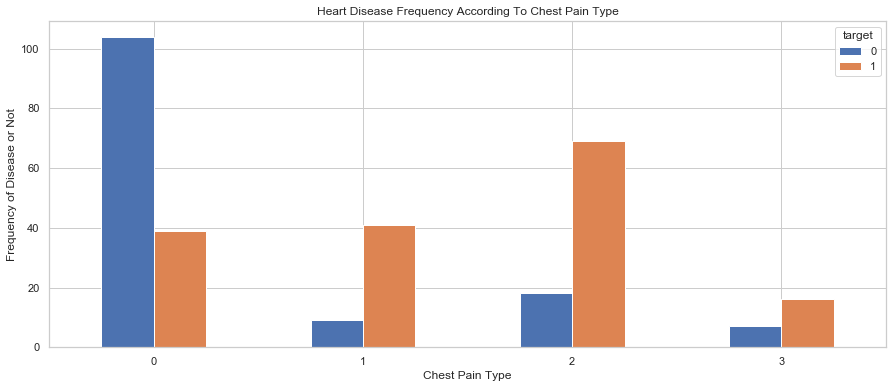

In [44]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

## Feature Engineering 
-------
I want to split the several variabls with the catalorical value to the dummy variables to better analyze the data get the more accurent result.

And I try to use another way: Lasso regression to pre-select the vairble to see if there is any surprise for the selection.

In [128]:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")

In [129]:
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,restecg,thalach,exang,oldpeak,slope,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,0,150,0,2.3,0,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,1,187,0,3.5,0,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,0,172,0,1.4,2,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,1,178,0,0.8,2,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,1,163,1,0.6,2,0,...,0,0,0,0,0,1,0,0,0,1


In [130]:
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,restecg,thalach,exang,oldpeak,ca,target,cp_0,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,0,150,0,2.3,0,1,0,0,0,1,0,1,0,0,1,0,0
1,37,1,130,1,187,0,3.5,0,1,0,0,1,0,0,0,1,0,1,0,0
2,41,0,130,0,172,0,1.4,0,1,0,1,0,0,0,0,1,0,0,0,1
3,56,1,120,1,178,0,0.8,0,1,0,1,0,0,0,0,1,0,0,0,1
4,57,0,120,1,163,1,0.6,0,1,1,0,0,0,0,0,1,0,0,0,1


In [131]:
target_column = ['target'] 
predictors = list(set(list(df.columns))-set(target_column))


In [132]:
#try to do the variable pre-selection
X = df[predictors].values
y = df[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(212, 19)
(91, 19)


In [133]:
from sklearn import linear_model
from sklearn.linear_model import Lasso
clf = linear_model.Lasso(alpha=0.1)
clf.fit(X_train, y_train)
Lasso(alpha=0.1)
print(clf.coef_)


[ 0.00766207 -0.         -0.          0.          0.         -0.
  0.         -0.02498566 -0.         -0.         -0.          0.
  0.         -0.         -0.02903187  0.         -0.00354121  0.
 -0.        ]


### Conclusion after trying to use Lasso regression to pre-select the variables
-------
I think the result of using lasso regression to pre-select the variable is a little bit strange because we need to delete so many variables, so I decide not to using the preselection

### Normalize the data Transfer the data

In [134]:
y = df.target.values
x_data = df.drop(['target'], axis = 1)

In [135]:
#normalize the data
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

# Fitting Model
--------
1. Split the data into training set and the test set
2. Use logistic, svm, knn, naive bayes and random forest to fit the model using training set
3. Get the test error of each model and compare them to select the final model we want to use

In [136]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)


In [137]:
#transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [138]:
#logistic regression
accuracies = {}

lr = LogisticRegression()
lr.fit(x_train.T,y_train.T)
acc = lr.score(x_test.T,y_test.T)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy {:.2f}%".format(acc))

Test Accuracy 86.89%


/Users/lukezhao/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [139]:
#KNN classification
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

print("{} NN Score: {:.2f}%".format(2, knn.score(x_test.T, y_test.T)*100))

2 NN Score: 78.69%


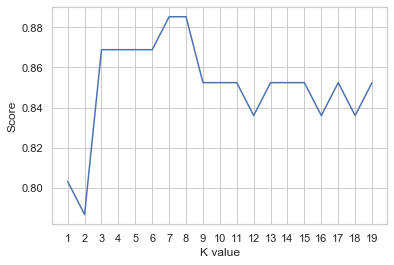

Maximum KNN Score is 88.52%


In [140]:
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(x_train.T, y_train.T)
    scoreList.append(knn2.score(x_test.T, y_test.T))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList)*100
accuracies['KNN'] = acc
print("Maximum KNN Score is {:.2f}%".format(acc))

In [141]:
#SVM classification
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(x_train.T, y_train.T)

acc = svm.score(x_test.T,y_test.T)*100
accuracies['SVM'] = acc
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))


Test Accuracy of SVM Algorithm: 86.89%


/Users/lukezhao/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [142]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train.T, y_train.T)

acc = nb.score(x_test.T,y_test.T)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 86.89%


In [143]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train.T, y_train.T)

acc = rf.score(x_test.T,y_test.T)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

Random Forest Algorithm Accuracy Score : 86.89%


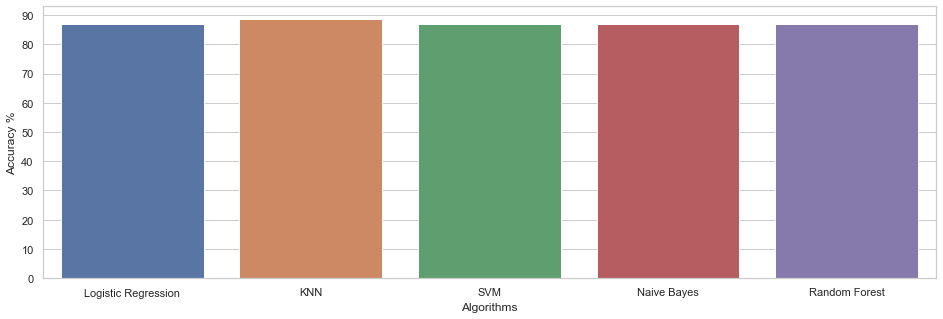

In [144]:
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.show()

# Conlusion Of The Fitting Model
-----
After fitting the model, we can see that the logistic regression model, SVM, Naive Bayes and Random Forest they all have the 86.89% accurency and the KNN model with a 7 and 8 neighbors has the 88.53% accurency.

From the comparision of the result, we can find that the the KNN classification with 7 or 8 neighbors and the 88.53% accuracy has the best performance of the classification among the other models.

So I decide to use KNN with 8 neighbors to do the classification for this project because it will have a better prediction performance to predict if a patience have heart disease or not.

